In [8]:
from google. colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn import preprocessing
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,average_precision_score,confusion_matrix
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib

sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.externals import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/drive/My Drive/NIDS_ML/UNSW_NB15_training-set.csv')
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
data.shape

(82332, 45)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
data.drop('service',axis='columns',inplace=True)

In [ ]:
data.isnull().sum()

id                   0
dur                  0
proto                0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [ ]:
data['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [ ]:
data['state'].value_counts()

FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

In [ ]:
data

,id,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
features = pd.read_csv('/content/drive/MyDrive/NIDS_ML/NUSW-NB15_features.csv',encoding='cp1252')

In [ ]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
features['Type '] = features['Type '].str.lower()

In [ ]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [ ]:
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)


In [ ]:
for c in integer_names:
  pd.to_numeric(data[c])

In [ ]:
for c in binary_names:
  pd.to_numeric(data[c])

In [ ]:
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [ ]:
data

,id,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


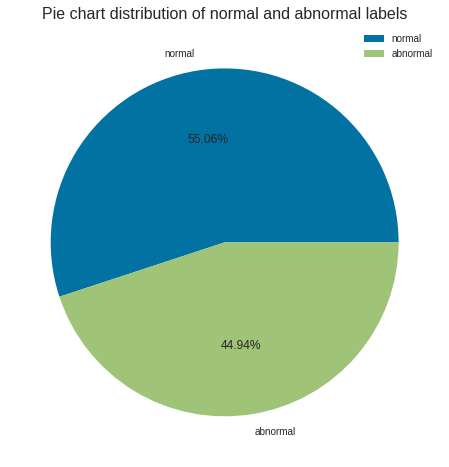

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

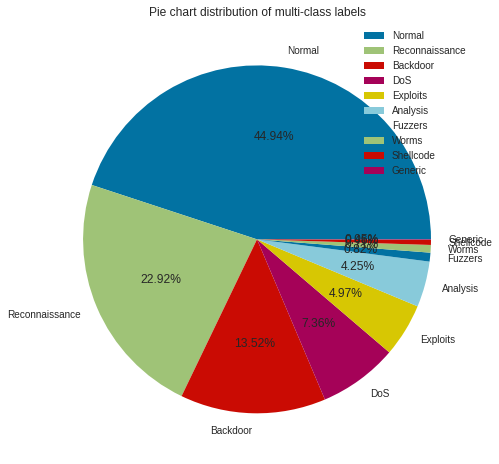

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

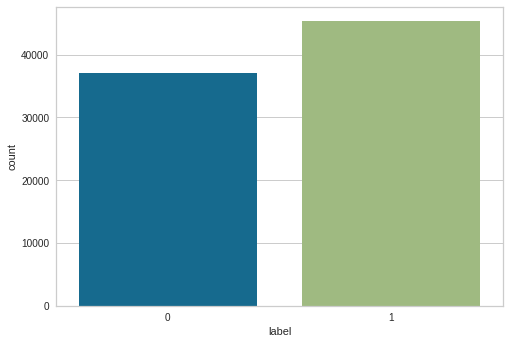

In [ ]:
sns.countplot(data['label'])

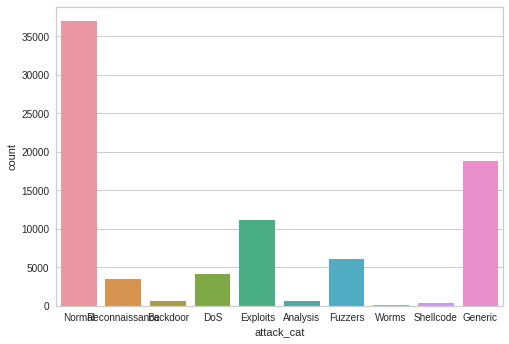

In [ ]:
sns.countplot(data['attack_cat'])

In [ ]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'state'], dtype='object')

In [ ]:
data_cat = data[cat_col].copy()
data_cat.head()

,proto,state
0,udp,INT
1,udp,INT
2,udp,INT
3,udp,INT
4,udp,INT


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_cat['proto'] = le.fit_transform(data_cat['proto'])
data_cat['state'] = le.fit_transform(data_cat['state'])

In [ ]:
data_cat

,proto,state
0,117,4
1,117,4
2,117,4
3,117,4
4,117,4
...,...,...
82327,117,4
82328,111,3
82329,6,4
82330,6,4


In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto', 'state']


In [ ]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,proto,state
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,0,0,0,1,2,0,Normal,0,117,4
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,0,0,0,1,2,0,Normal,0,117,4
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,0,0,0,1,3,0,Normal,0,117,4
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,0,0,0,2,3,0,Normal,0,117,4
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,0,0,0,2,3,0,Normal,0,117,4


In [ ]:
data = normalization(data.copy(),num_col)

In [ ]:
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,proto,state
0,1,1.833334e-07,0.000094,0.0,0.000033,0.0,0.090909,0.996078,0.0,0.034238,...,0.0,0.0,0.0,0.000000,0.016393,0.0,Normal,0,0.9,0.666667
1,2,1.333334e-07,0.000094,0.0,0.000121,0.0,0.125000,0.996078,0.0,0.167236,...,0.0,0.0,0.0,0.000000,0.016393,0.0,Normal,0,0.9,0.666667
2,3,8.333335e-08,0.000094,0.0,0.000073,0.0,0.200000,0.996078,0.0,0.162187,...,0.0,0.0,0.0,0.000000,0.032787,0.0,Normal,0,0.9,0.666667
3,4,1.000000e-07,0.000094,0.0,0.000061,0.0,0.166667,0.996078,0.0,0.113895,...,0.0,0.0,0.0,0.016949,0.032787,0.0,Normal,0,0.9,0.666667
4,5,1.666667e-07,0.000094,0.0,0.000146,0.0,0.100000,0.996078,0.0,0.161427,...,0.0,0.0,0.0,0.016949,0.032787,0.0,Normal,0,0.9,0.666667


Binary Labels

In [ ]:
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [ ]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

Multi-class Labels

In [ ]:
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [ ]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [ ]:
num_col.append('label')

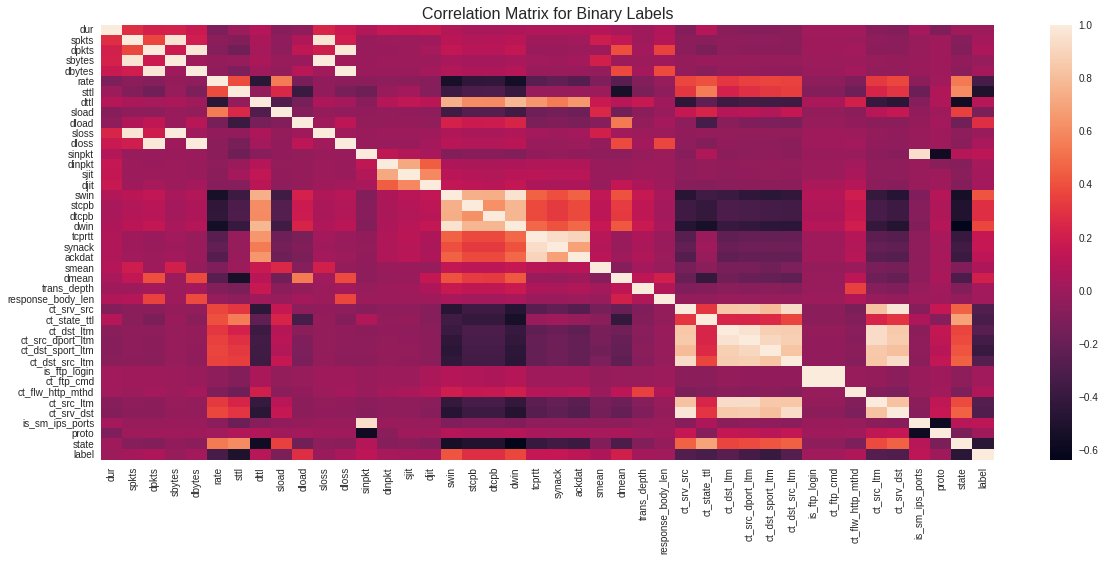

In [ ]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

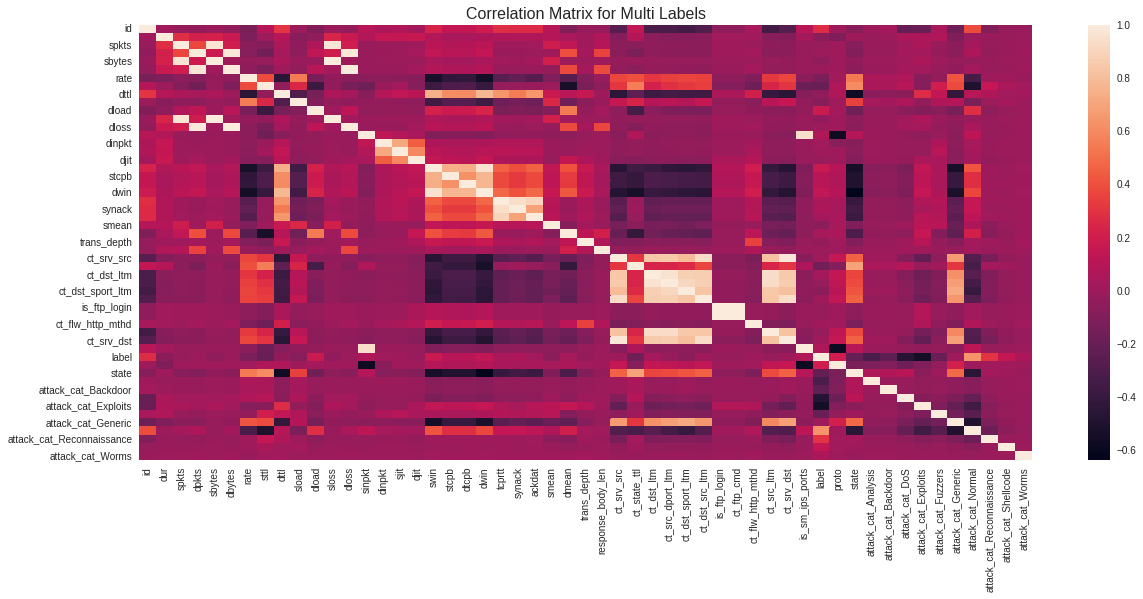

In [ ]:
num_col = list(multi_data.select_dtypes(include='number').columns)
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.show()

Feature Selection

Binary Labels

In [ ]:
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

ct_state_ttl        0.318517
rate                0.328629
ct_src_dport_ltm    0.341513
dwin                0.369257
ct_dst_sport_ltm    0.393668
swin                0.414504
state               0.459040
sttl                0.504159
label               1.000000
Name: label, dtype: float64

In [ ]:
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'swin', 'dwin', 'ct_state_ttl', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'state', 'label'],
      dtype='object')

In [ ]:
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,swin,dwin,ct_state_ttl,ct_src_dport_ltm,ct_dst_sport_ltm,state,label
0,0.090909,0.996078,0.0,0.0,0.333333,0.000000,0.0,0.666667,1
1,0.125000,0.996078,0.0,0.0,0.333333,0.000000,0.0,0.666667,1
2,0.200000,0.996078,0.0,0.0,0.333333,0.000000,0.0,0.666667,1
3,0.166667,0.996078,0.0,0.0,0.333333,0.017241,0.0,0.666667,1
4,0.100000,0.996078,0.0,0.0,0.333333,0.017241,0.0,0.666667,1
...,...,...,...,...,...,...,...,...,...
82327,0.200000,0.996078,0.0,0.0,0.333333,0.000000,0.0,0.666667,1
82328,0.000024,0.996078,1.0,1.0,0.166667,0.000000,0.0,0.500000,1
82329,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.0,0.666667,1
82330,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.0,0.666667,1


In [ ]:
bin_data.to_csv('./bin_data.csv')

Multi-class Labels

In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.2]
highest_corr_multi.sort_values(ascending=True)

state                        0.214254
attack_cat_Backdoor          0.235245
id                           0.274428
attack_cat_Reconnaissance    0.296008
attack_cat_Analysis          0.317254
attack_cat_DoS               0.477123
attack_cat_Exploits          0.549046
attack_cat_Normal            0.638825
label                        1.000000
Name: label, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['id', 'label', 'state', 'attack_cat_Analysis', 'attack_cat_Backdoor',
       'attack_cat_DoS', 'attack_cat_Exploits', 'attack_cat_Normal',
       'attack_cat_Reconnaissance'],
      dtype='object')

In [ ]:
multi_data = multi_data[multi_cols].copy()

In [ ]:
multi_data.to_csv('./multi_data.csv')

BINARY CLASSIFICATION

In [ ]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

GaussianNB:Accuracy :  75.55110220440882


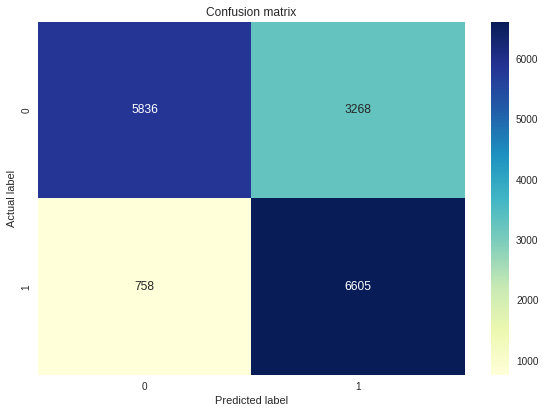

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      9104
           1       0.67      0.90      0.77      7363

    accuracy                           0.76     16467
   macro avg       0.78      0.77      0.75     16467
weighted avg       0.79      0.76      0.75     16467



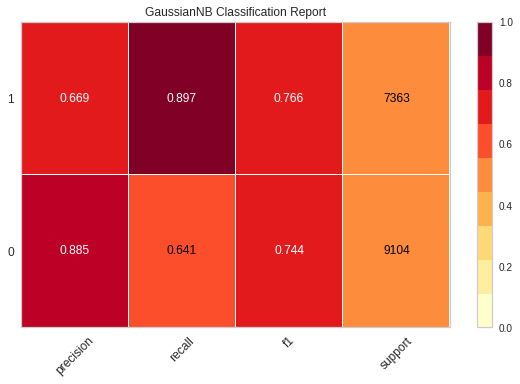

In [ ]:
#GaussianNB
def GNB(X_train,y_train,X_test,y_test):
    gnb_clf = GaussianNB()
    pred = gnb_clf.fit(X_train, y_train).predict(X_test)
    pred= gnb_clf.predict(X_test)
    print ("GaussianNB:Accuracy : ", accuracy_score(y_test,pred)*100)

    #confusion Matrix
    matrix =confusion_matrix(y_test, pred)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Classification Report
    prediction=gnb_clf.predict(X_test)
    print(classification_report(y_test, prediction))
    visualizer = ClassificationReport(gnb_clf, support=True)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    g = visualizer.poof()
GNB(X_train,y_train,X_test,y_test)

KNN:Accuracy :  83.45175198882615


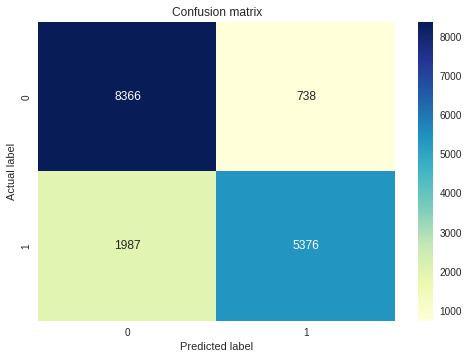

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      9104
           1       0.88      0.73      0.80      7363

    accuracy                           0.83     16467
   macro avg       0.84      0.82      0.83     16467
weighted avg       0.84      0.83      0.83     16467



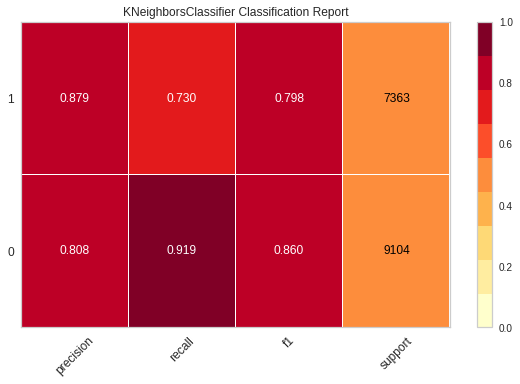

In [ ]:
#KNeighbours
def KNN1(X_train,y_train,X_test,y_test):
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print ("KNN:Accuracy : ", accuracy_score(y_test,pred)*100)

    #confusion Matrix
    matrix =confusion_matrix(y_test, pred)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Classification Report
    prediction=knn.predict(X_test)
    print(classification_report(y_test, prediction))
    visualizer = ClassificationReport(knn, support=True)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    g = visualizer.poof()
KNN1(X_train,y_train,X_test,y_test)

LogisticRegression:Accuracy :  75.35677415436935


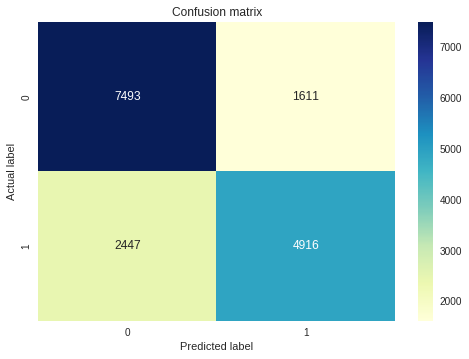

              precision    recall  f1-score   support

           0       0.75      0.82      0.79      9104
           1       0.75      0.67      0.71      7363

    accuracy                           0.75     16467
   macro avg       0.75      0.75      0.75     16467
weighted avg       0.75      0.75      0.75     16467



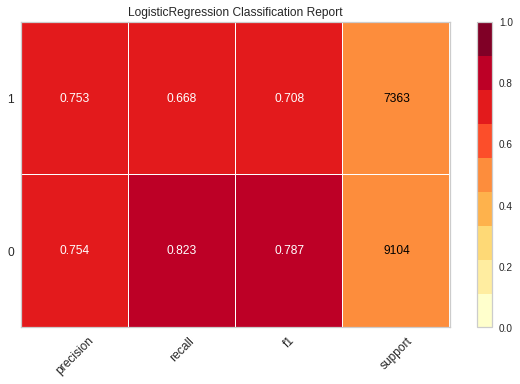

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
def logisticreg(X_train,y_train,X_test,y_test):
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    print ("LogisticRegression:Accuracy : ", accuracy_score(y_test,pred)*100)

    #confusion Matrix
    matrix =confusion_matrix(y_test, pred)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Classification Report
    prediction=lr.predict(X_test)
    print(classification_report(y_test, prediction))
    visualizer = ClassificationReport(lr, support=True)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    g = visualizer.poof()
logisticreg(X_train,y_train,X_test,y_test)

Random Forest:Accuracy :  81.04694236958765


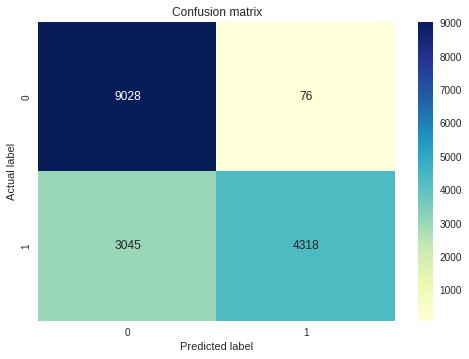

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      9104
           1       0.98      0.59      0.73      7363

    accuracy                           0.81     16467
   macro avg       0.87      0.79      0.79     16467
weighted avg       0.85      0.81      0.80     16467



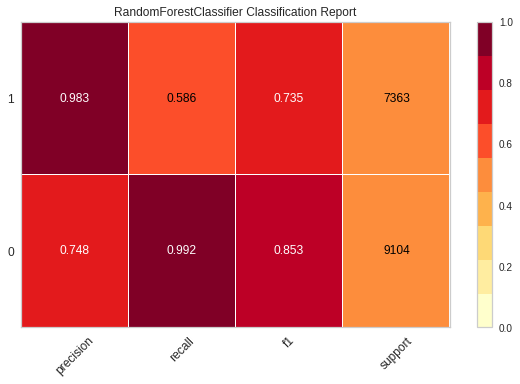

In [ ]:
#Randon Forest 
def random_forest(X_train,y_train,X_test,y_test):
    rf = RandomForestClassifier(max_depth=2, min_samples_split=2)
    rf.fit(X_train,y_train)
    pred = rf.predict(X_test)
    print ("Random Forest:Accuracy : ", accuracy_score(y_test,pred)*100)

    #confusion Matrix
    matrix =confusion_matrix(y_test, pred)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Classification Report
    prediction=rf.predict(X_test)
    print(classification_report(y_test, prediction))
    visualizer = ClassificationReport(rf, support=True)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    g = visualizer.poof()
random_forest(X_train,y_train,X_test,y_test)

Stacking Classifier:Accuracy :  85.57114228456913


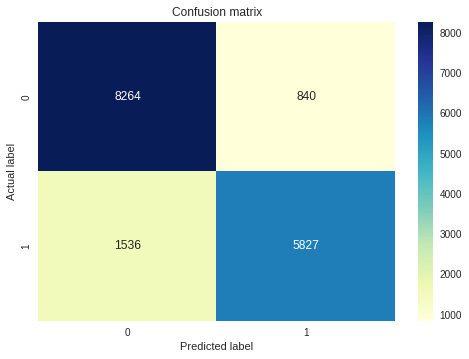

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      9104
           1       0.87      0.79      0.83      7363

    accuracy                           0.86     16467
   macro avg       0.86      0.85      0.85     16467
weighted avg       0.86      0.86      0.85     16467



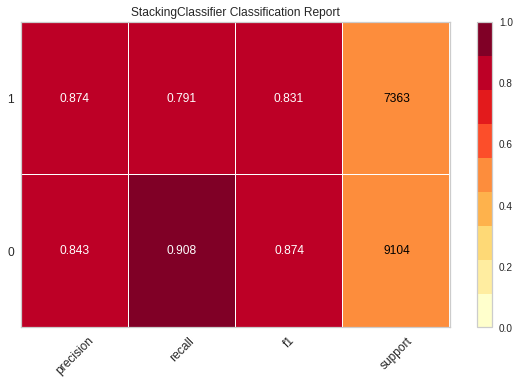

In [ ]:
#Stacking Classifier
xg = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0,min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)
rf = RandomForestClassifier(bootstrap=True,max_depth= 70,max_features= 'auto',min_samples_leaf= 4,min_samples_split= 10,n_estimators= 400)
knn=KNeighborsClassifier()

def stacking(X_train,y_train,X_test,y_test):
    classifiers=[rf,knn]
    sc = StackingClassifier(classifiers,meta_classifier=xg)  
    sc.fit(X_train,y_train)
    pred = sc.predict(X_test)
    print ("Stacking Classifier:Accuracy : ", accuracy_score(y_test,pred)*100)

    #confusion Matrix
    matrix =confusion_matrix(y_test, pred)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Classification Report
    prediction=sc.predict(X_test)
    print(classification_report(y_test, prediction))
    visualizer = ClassificationReport(sc, support=True)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    g = visualizer.poof()
stacking(X_train,y_train,X_test,y_test)

MULTI-CLASS CLASSIFICATION

In [ ]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

GaussianNB:Accuracy :  71.33198380566802


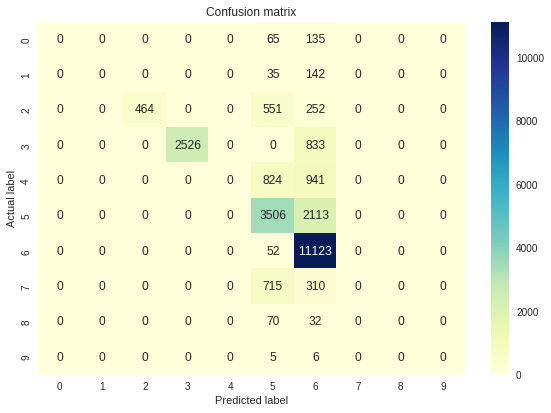

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.00      0.00      0.00       177
           2       1.00      0.37      0.54      1267
           3       1.00      0.75      0.86      3359
           4       0.00      0.00      0.00      1765
           5       0.60      0.62      0.61      5619
           6       0.70      1.00      0.82     11175
           7       0.00      0.00      0.00      1025
           8       0.00      0.00      0.00       102
           9       0.00      0.00      0.00        11

    accuracy                           0.71     24700
   macro avg       0.33      0.27      0.28     24700
weighted avg       0.64      0.71      0.66     24700



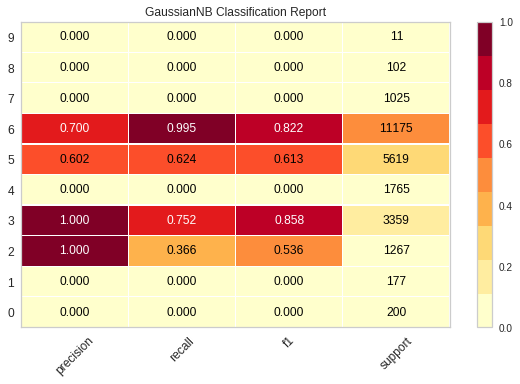

In [ ]:
#GaussianNB
def GNB(X_train,y_train,X_test,y_test):
    gnb_clf = GaussianNB()
    pred = gnb_clf.fit(X_train, y_train).predict(X_test)
    pred= gnb_clf.predict(X_test)
    
    print ("GaussianNB:Accuracy : ", accuracy_score(y_test,pred)*100)

    #confusion Matrix
    matrix =confusion_matrix(y_test, pred)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Classification Report
    prediction=gnb_clf.predict(X_test)
    print(classification_report(y_test, prediction))
    visualizer = ClassificationReport(gnb_clf, support=True)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    g = visualizer.poof()
GNB(X_train,y_train,X_test,y_test)

KNN:Accuracy :  75.10121457489879


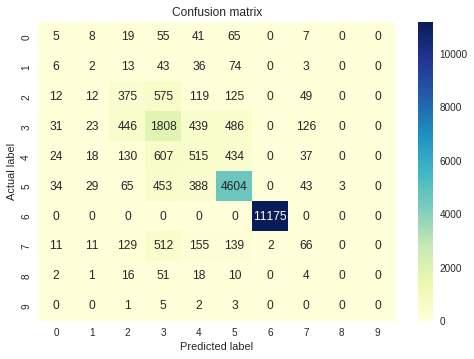

              precision    recall  f1-score   support

           0       0.04      0.03      0.03       200
           1       0.02      0.01      0.01       177
           2       0.31      0.30      0.30      1267
           3       0.44      0.54      0.48      3359
           4       0.30      0.29      0.30      1765
           5       0.78      0.82      0.80      5619
           6       1.00      1.00      1.00     11175
           7       0.20      0.06      0.10      1025
           8       0.00      0.00      0.00       102
           9       0.00      0.00      0.00        11

    accuracy                           0.75     24700
   macro avg       0.31      0.30      0.30     24700
weighted avg       0.73      0.75      0.74     24700



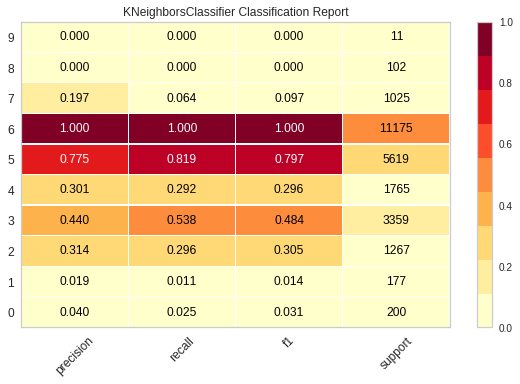

In [ ]:
#KNeighbours
def KNN1(X_train,y_train,X_test,y_test):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print ("KNN:Accuracy : ", accuracy_score(y_test,pred)*100)

    #confusion Matrix
    matrix =confusion_matrix(y_test, pred)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Classification Report
    prediction=knn.predict(X_test)
    print(classification_report(y_test, prediction))
    visualizer = ClassificationReport(knn, support=True)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    g = visualizer.poof()
KNN1(X_train,y_train,X_test,y_test)

LogisticRegression:Accuracy :  45.24291497975709


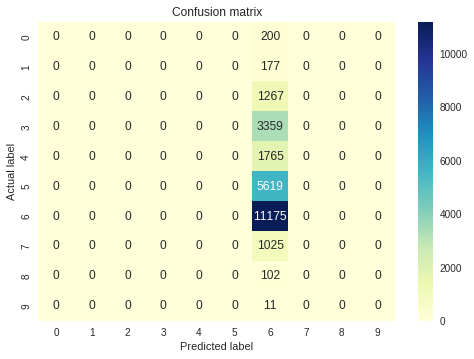

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.00      0.00      0.00       177
           2       0.00      0.00      0.00      1267
           3       0.00      0.00      0.00      3359
           4       0.00      0.00      0.00      1765
           5       0.00      0.00      0.00      5619
           6       0.45      1.00      0.62     11175
           7       0.00      0.00      0.00      1025
           8       0.00      0.00      0.00       102
           9       0.00      0.00      0.00        11

    accuracy                           0.45     24700
   macro avg       0.05      0.10      0.06     24700
weighted avg       0.20      0.45      0.28     24700



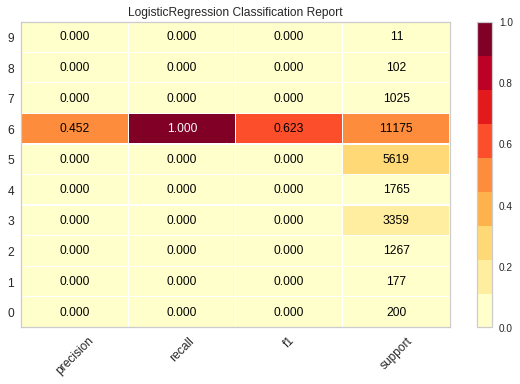

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
def logisticreg(X_train,y_train,X_test,y_test):
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    print ("LogisticRegression:Accuracy : ", accuracy_score(y_test,pred)*100)

    #confusion Matrix
    matrix =confusion_matrix(y_test, pred)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Classification Report
    prediction=lr.predict(X_test)
    print(classification_report(y_test, prediction))
    visualizer = ClassificationReport(lr, support=True)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    g = visualizer.poof()
logisticreg(X_train,y_train,X_test,y_test)

Random Forest:Accuracy :  82.75303643724696


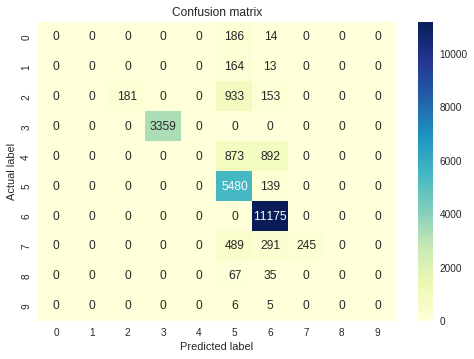

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.00      0.00      0.00       177
           2       1.00      0.14      0.25      1267
           3       1.00      1.00      1.00      3359
           4       0.00      0.00      0.00      1765
           5       0.67      0.98      0.79      5619
           6       0.88      1.00      0.94     11175
           7       1.00      0.24      0.39      1025
           8       0.00      0.00      0.00       102
           9       0.00      0.00      0.00        11

    accuracy                           0.83     24700
   macro avg       0.45      0.34      0.34     24700
weighted avg       0.78      0.83      0.77     24700



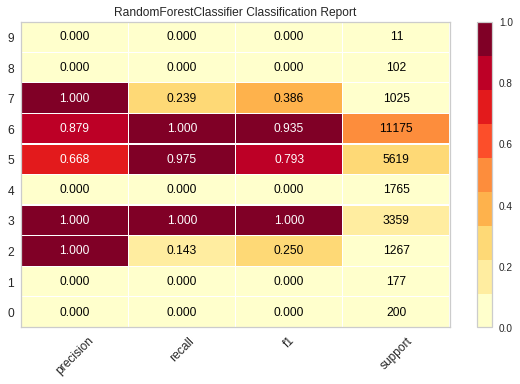

In [ ]:
#Random Forest
def random_forest(X_train,y_train,X_test,y_test):
    rf = RandomForestClassifier(max_depth=2, min_samples_split=2,)
    rf.fit(X_train,y_train)
    pred = rf.predict(X_test)
    print ("Random Forest:Accuracy : ", accuracy_score(y_test,pred)*100)

    #confusion Matrix
    matrix =confusion_matrix(y_test, pred)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Classification Report
    prediction=rf.predict(X_test)
    print(classification_report(y_test, prediction))
    visualizer = ClassificationReport(rf, support=True)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    g = visualizer.poof()
random_forest(X_train,y_train,X_test,y_test)

Stacking Classifier:Accuracy :  96.92307692307692


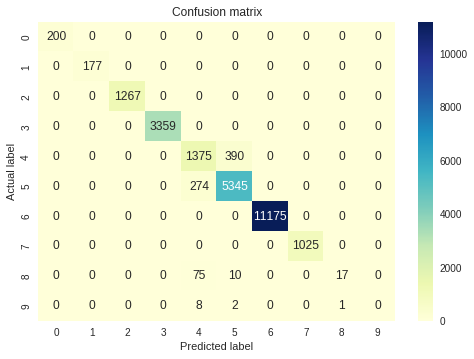

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       177
           2       1.00      1.00      1.00      1267
           3       1.00      1.00      1.00      3359
           4       0.79      0.78      0.79      1765
           5       0.93      0.95      0.94      5619
           6       1.00      1.00      1.00     11175
           7       1.00      1.00      1.00      1025
           8       0.94      0.17      0.28       102
           9       0.00      0.00      0.00        11

    accuracy                           0.97     24700
   macro avg       0.87      0.79      0.80     24700
weighted avg       0.97      0.97      0.97     24700



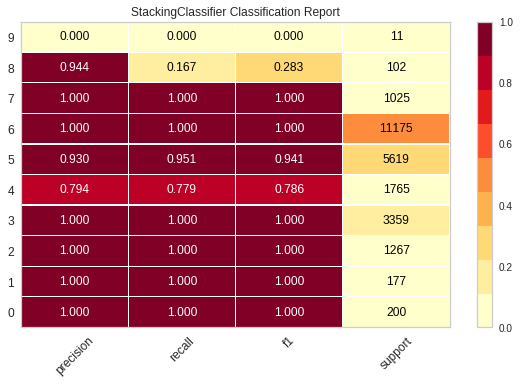

In [ ]:
#Stacking Classifier
xg = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0,min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)
rf = RandomForestClassifier(bootstrap=True,max_depth= 70,max_features= 'auto',min_samples_leaf= 4,min_samples_split= 10,n_estimators= 400)
knn=KNeighborsClassifier()

def stacking(X_train,y_train,X_test,y_test):
    classifiers=[rf,knn]
    sc = StackingClassifier(classifiers,meta_classifier=xg)  
    sc.fit(X_train,y_train)
    pred = sc.predict(X_test)
    print ("Stacking Classifier:Accuracy : ", accuracy_score(y_test,pred)*100)

    #confusion Matrix
    matrix =confusion_matrix(y_test, pred)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Classification Report
    prediction=sc.predict(X_test)
    print(classification_report(y_test, prediction))
    visualizer = ClassificationReport(sc, support=True)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    g = visualizer.poof()
stacking(X_train,y_train,X_test,y_test)